<a href="https://colab.research.google.com/github/RafalJakobsen/School_of_AI/blob/master/Hypothesis_Testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1> Hypothesis Testing </h1>

<h2> Hypothesis Testing and the T-Test </h2>

<h3> Source: 
 
  [1](http://hamelg.blogspot.com/2015/11/python-for-data-analysis-part-24.html) 
  [2](https://www.theschool.ai/courses/data-lit/lessons/reading-assignment-hypothesis-testing/)
  
  
  </h3>
  
  <h3> Intro </h3>
  
<p>
  While working on the Data Lit | School of AI course I get introduced to reading assignment / homework along the way, you can follow my journey on my colab notebook, my hope is that both me and you can reuse this in the future.


*I always like to have well documented notes. + I get to improve my HTML skill wrting on Colab.*
  
  Win, win for everyone!
</p>

<h3> Hypothesis Testing Basics </h3>


**%matplotlib inline** sets the backend of matplotlib to the 'inline' backend:

With this backend, the output of plotting commands is displayed inline within frontends like the Jupyter notebook, directly below the code cell that produced it. The resulting plots will then also be stored in the notebook document.


<h3> One-Sample T-Test </h3>
A one-sample t-test checks whether a sample mean differs from the population mean. 

In [0]:
#%matplotlib sets the backend of matplotlib to the 'inline' backend:
#With this backend, the output of plotting commands is displayed inline within frontends like the Jupyter notebook, directly below the code cell that produced it. 
#The resulting plots will then also be stored in the notebook document.
%matplotlib inline

In [0]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import math

In [0]:
np.random.seed(6)

population_ages1 = stats.poisson.rvs(loc = 18, mu = 35, size = 150000)
population_ages2 = stats.poisson.rvs(loc = 18, mu = 10, size = 100000)
population_ages = np.concatenate((population_ages1, population_ages2))

minnesota_ages1 = stats.poisson.rvs(loc = 18, mu = 30, size = 100000)
minnesota_ages2 = stats.poisson.rvs(loc = 18, mu = 10, size = 20)
minnesota_ages = np.concatenate((minnesota_ages1, minnesota_ages2))

print("Population Ages Mean:" , population_ages.mean())
print("Minnesota Ages Mean:" , minnesota_ages.mean())

Population Ages Mean: 43.000112
Minnesota Ages Mean: 48.00888822235553


In [0]:
stats.ttest_1samp(a = minnesota_ages, #sample data
                 popmean = population_ages.mean()) # pop Mean

Ttest_1sampResult(statistic=288.6912310255665, pvalue=0.0)

We can check the quantiles with stats.t.ppf():

In [0]:
stats.t.ppf(q = 0.025, # quantile to check
           df = 49 )   # degrees of freedom

-2.0095752344892093

In [0]:
stats.t.ppf(q = 0.975,  # quantile to check
            df = 49 )   # degrees of freedom

2.009575234489209

We can calculate the chances of seeing a result as extreme as the one we observed (known as the p-value) by passing the t-statistic in as the quantile to the stats.t.cdf() function:


In [0]:
stats.t.cdf(x = 2.5742,  #t-test statistic
           df = 49) * 2  #multiply by two for two tailed test*
  

1.9868789334543098


*Note: The alternative hypothesis we are checking is whether the sample mean differs (is not equal to) the population mean. Since the sample could differ in either the positive or negative direction we multiply the by two.

In [0]:
sigma = minnesota_ages.std()/math.sqrt(50)  # Sample stdev/sample size

stats.t.interval(0.95,                        # Confidence level
                 df = 49,                     # Degrees of freedom
                 loc = minnesota_ages.mean(), # Sample mean
                 scale= sigma)                # Standard dev estimate

(46.449484528871785, 49.568291915839275)

In [0]:
stats.t.interval(alpha = 0.99,                # Confidence level
                 df = 49,                     # Degrees of freedom
                 loc = minnesota_ages.mean(), # Sample mean
                 scale= sigma)                # Standard dev estimate

(45.92928108234102, 50.08849536237004)

<h3> Two-Sample T-Test </h3>


A two-sample t-test investigates whether the means of two independent data samples differ from one another. In a two-sample test, the null hypothesis is that the means of both groups are the same.

In [0]:
np.random.seed(12)
wisconsin_ages1 = stats.poisson.rvs(loc = 18, mu = 33, size = 30)
wisconsin_ages2 = stats.poisson.rvs(loc = 18, mu = 13, size = 20)
wisconsin_ages = np.concatenate((wisconsin_ages1, wisconsin_ages2))

print( wisconsin_ages.mean() )

42.8


In [0]:
stats.ttest_ind(a = minnesota_ages,
               b = wisconsin_ages,
               equal_var = False) # Assume samples have equal variance?***

Ttest_indResult(statistic=3.5253516013476958, pvalue=0.0009278164984414271)

<h3> Paired T-Test </h3>
The basic two sample t-test is designed for testing differences between independent groups.

We can conduct a paired t-test using the scipy function stats.ttest_rel(). 


In [0]:
np.random.seed(11)
before = stats.norm.rvs(scale=30, loc=250, size=100)
after = before + stats.norm.rvs(scale = 5, loc = 1.25, size = 100)

weight_df = pd.DataFrame({"weight_before":before,
                         "weight_after":after,
                         "weight_change":after-before})

weight_df.describe() #Check a summary of the data

,weight_before,weight_after,weight_change
count,100.000000,100.000000,100.000000
mean,250.345546,251.615171,1.269625
std,28.132539,28.422183,4.783696
min,170.400443,168.413930,-8.995286
25%,230.421042,231.648236,-1.546211
50%,250.830805,253.634089,1.086537
75%,270.637145,271.427258,4.238673
max,314.700233,319.220357,12.259282


In [0]:

stats.ttest_rel(a = before,
                b = after)

Ttest_relResult(statistic=-2.6540671054984104, pvalue=0.009266778228120703)

<h3>Type I and Type II Error </h3>

**Type I error** describes a situation where you reject the null hypothesis when it is actually true. This type of error is also known as a "false positive" or "false hit". The type 1 error rate is equal to the significance level α, so setting a higher confidence level (and therefore lower alpha) reduces the chances of getting a false positive.

**Type II error** describes a situation where you fail to reject the null hypothesis when it is actually false. Type II error is also known as a "false negative" or "miss". The higher your confidence level, the more likely you are to make a type II error.

Text(0, 0.02, 'Type 2 Error')

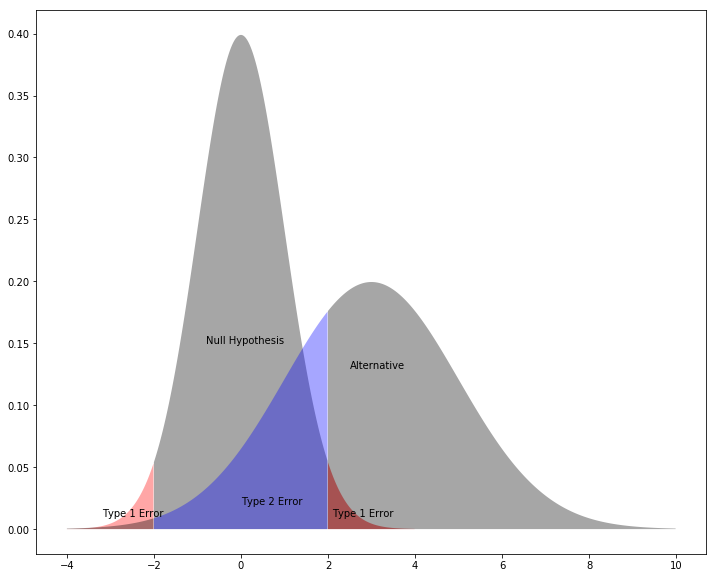

In [0]:
# The Figure instance returned will also be passed to new_figure_manager in the backends, which allows to hook custom Figure classes into the pyplot interface. 
#Additional kwargs will be passed to the Figure init function.
plt.figure(figsize=(12,10))

plt.fill_between(x = np.arange(-4,-2,0.01), 
                 y1 = stats.norm.pdf(np.arange(-4,-2,0.01)) ,
                 facecolor = 'red',
                 alpha = 0.35)

plt.fill_between(x = np.arange(-2,2,0.01), 
                 y1 = stats.norm.pdf(np.arange(-2,2,0.01)) ,
                 facecolor = 'black',
                 alpha = 0.35)

plt.fill_between(x = np.arange(2,4,0.01), 
                 y1 = stats.norm.pdf(np.arange(2,4,0.01)) ,
                 facecolor = 'red',
                 alpha = 0.5)

plt.fill_between(x = np.arange(-4,-2,0.01), 
                 y1 = stats.norm.pdf(np.arange(-4,-2,0.01),loc=3, scale=2) ,
                 facecolor = 'black',
                 alpha = 0.35)

plt.fill_between(x=np.arange(-2,2,0.01), 
                 y1 = stats.norm.pdf(np.arange(-2,2,0.01),loc=3, scale=2) ,
                 facecolor = 'blue',
                 alpha = 0.35)

plt.fill_between(x=np.arange(2,10,0.01), 
                 y1 = stats.norm.pdf(np.arange(2,10,0.01),loc=3, scale=2),
                 facecolor = 'black',
                 alpha = 0.35)

plt.text(x = -0.8, y = 0.15, s = "Null Hypothesis")
plt.text(x = 2.5, y = 0.13, s = "Alternative")
plt.text(x = 2.1, y = 0.01, s = "Type 1 Error")
plt.text(x = -3.2, y = 0.01, s = "Type 1 Error")
plt.text(x = 0, y = 0.02, s = "Type 2 Error")

In the plot above, the red areas indicate type I errors assuming the alternative hypothesis is not different from the null for a two-sided test with a 95% confidence level.

The blue area represents type II errors that occur when the alternative hypothesis is different from the null, as shown by the distribution on the right. 

Note that the Type II error rate is the area under the alternative distribution within the quantiles determined by the null distribution and the confidence level. We can calculate the type II error rate for the distributions above as follows:

In [0]:
lower_quantile = stats.norm.ppf(0.025)  # Lower cutoff value
upper_quantile = stats.norm.ppf(0.975)  # Upper cutoff value

# Area under alternative, to the left the lower cutoff value
low = stats.norm.cdf(lower_quantile,    
                     loc = 3,             
                     scale = 2)

# Area under alternative, to the left the upper cutoff value
high = stats.norm.cdf(upper_quantile, 
                      loc = 3, 
                      scale = 2)          

# Area under the alternative, between the cutoffs (Type II error)
high-low

0.294956061112323

With the normal distributions above, we'd fail to reject the null hypothesis about 30% of the time because the distributions are close enough together that they have significant overlap.